In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file
streamer_xl = pd.ExcelFile("C:\\Users\\woled\\Documents\\Datasets\\streamer\\spotify-2023.xlsx")

# Check the sheet names (optional, if you are unsure of the sheet name)
print(streamer_xl.sheet_names)

# Load the specific sheet into a DataFrame
streamer = pd.read_excel("C:\\Users\\woled\\Documents\\Datasets\\streamer\\spotify-2023.xlsx")

# Verify the type of the DataFrame
print(type(streamer))

# Now you can use `streamer_streamer` as your DataFrame
print(streamer.head())


['spotify-2023']
<class 'pandas.core.frame.DataFrame'>
                            track_name    artist(s)_name  artist_count  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
1                                 LALA       Myke Towers             1   
2                              vampire    Olivia Rodrigo             1   
3                         Cruel Summer      Taylor Swift             1   
4                       WHERE SHE GOES         Bad Bunny             1   

   released_year  released_month  released_day  in_spotify_playlists  \
0           2023               7            14                   553   
1           2023               3            23                  1474   
2           2023               6            30                  1397   
3           2019               8            23                  7858   
4           2023               5            18                  3133   

   in_spotify_charts    streams  in_apple_playlists  ...  bpm  key 

In [2]:
print(streamer.dtypes)
print(streamer.size)

track_name               object
artist(s)_name           object
artist_count              int64
released_year             int64
released_month            int64
released_day              int64
in_spotify_playlists      int64
in_spotify_charts         int64
streams                  object
in_apple_playlists        int64
in_apple_charts           int64
in_deezer_playlists       int64
in_deezer_charts          int64
in_shazam_charts        float64
bpm                       int64
key                      object
mode                     object
danceability_%            int64
valence_%                 int64
energy_%                  int64
acousticness_%            int64
instrumentalness_%        int64
liveness_%                int64
speechiness_%             int64
dtype: object
22872


In [3]:
streamer[['artist1', 'artist2', 'other']] = streamer['artist(s)_name'].str.split(',', n=2, expand=True)

# Fill missing values in 'artist2' and 'other' with a placeholder (if necessary)
streamer['artist2'] = streamer['artist2'].fillna('N/A')
streamer['other'] = streamer['other'].fillna('N/A')

streamer['artist1'] = streamer['artist1'].str.strip()
streamer['artist2'] = streamer['artist2'].str.strip()
streamer['other'] = streamer['other'].str.strip()


In [4]:
streamer = streamer.drop('other', axis = 1)

In [5]:
print(streamer['artist2'].value_counts())

artist2
N/A                     587
Bad Bunny                13
21 Savage                10
Peso Pluma                8
Rauw Alejandro            6
                       ... 
Eric Church               1
Os Gemeos da Putaria      1
Angela Aguilar            1
Vishal Dadlani            1
Sech                      1
Name: count, Length: 244, dtype: int64


In [6]:
# Fill missing values in 'key' column with 'Unknown' without reassigning
streamer['key'].fillna('Unknown', inplace=True)

# Now you can drop the columns you don't need
streamer = streamer.drop(['track_name', 'artist(s)_name'], axis=1)

# Fill missing values in 'in_shazam_charts' column with 0 without reassigning
streamer['in_shazam_charts'].fillna(0, inplace=True)

# Print any remaining missing values
print(streamer.isna().sum())


artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
artist1                 0
artist2                 0
dtype: int64


In [7]:
print(streamer.describe())

       artist_count  released_year  released_month  released_day  \
count    953.000000     953.000000      953.000000    953.000000   
mean       1.556139    2018.238195        6.033578     13.930745   
std        0.893044      11.116218        3.566435      9.201949   
min        1.000000    1930.000000        1.000000      1.000000   
25%        1.000000    2020.000000        3.000000      6.000000   
50%        1.000000    2022.000000        6.000000     13.000000   
75%        2.000000    2022.000000        9.000000     22.000000   
max        8.000000    2023.000000       12.000000     31.000000   

       in_spotify_playlists  in_spotify_charts  in_apple_playlists  \
count            953.000000         953.000000          953.000000   
mean            5200.124869          12.009444           67.812172   
std             7897.608990          19.575992           86.441493   
min               31.000000           0.000000            0.000000   
25%              875.000000          

artist_count               int64
released_year              int64
released_month             int64
released_day               int64
in_spotify_playlists       int64
in_spotify_charts          int64
streams                  float64
in_apple_playlists         int64
in_apple_charts            int64
in_deezer_playlists        int64
in_deezer_charts           int64
in_shazam_charts         float64
bpm                        int64
key                       object
mode                    category
danceability_%             int64
valence_%                  int64
energy_%                   int64
acousticness_%             int64
instrumentalness_%         int64
liveness_%                 int64
speechiness_%              int64
artist1                   object
artist2                   object
dtype: object
['Major', 'Minor']
Categories (2, object): ['Major', 'Minor']
0      141381703.0
1      133716286.0
2      140003974.0
3      800840817.0
4      303236322.0
          ...     
948     91473363.0

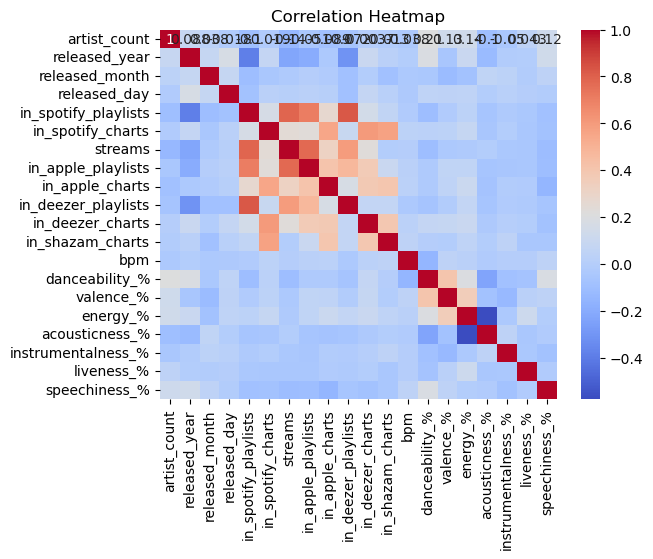

In [15]:
print(streamer.dtypes)
print(streamer['mode'].unique())
# First, convert the 'streams' column to numeric, coercing errors to NaN
streamer['streams'] = pd.to_numeric(streamer['streams'], errors='coerce')

# Calculate the mean of the numeric values in the 'streams' column
mean_value = streamer['streams'].mean()

# Replace values where the string length is less than 30 with the mean
streamer['streams'] = streamer.apply(lambda row: mean_value if isinstance(row['streams'], str) and len(row['streams']) < 30 else row['streams'], axis=1)

print(streamer['streams'])

streamer['streams'] = pd.to_numeric(streamer['streams'], errors='coerce')

streamer['mode'] = streamer['mode'].astype('category')
sns.heatmap(streamer.select_dtypes(include = ['int', 'float']).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [9]:
#sns.pairplot(streamer, vars=streamer.columns)
#plt.title(' value distributions')
#plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

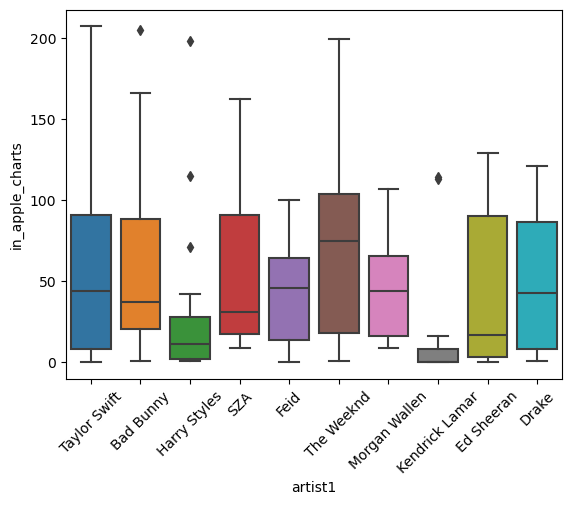

In [10]:
top_artist = streamer['artist1'].value_counts().sort_values(ascending=False).head(10)
top_artist = streamer[streamer['artist1'].isin(top_artist.index)]
sns.boxplot(data = top_artist, y = 'in_apple_charts', x = 'artist1')
plt.xticks(rotation = 45)
plt.show

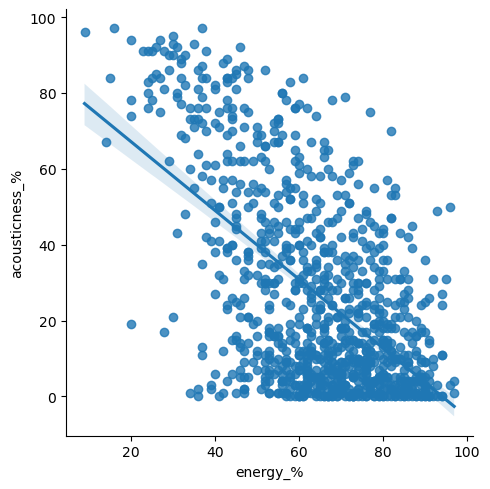

In [11]:
sns.lmplot(data = streamer, x = 'energy_%', y = 'acousticness_%')
plt.show()

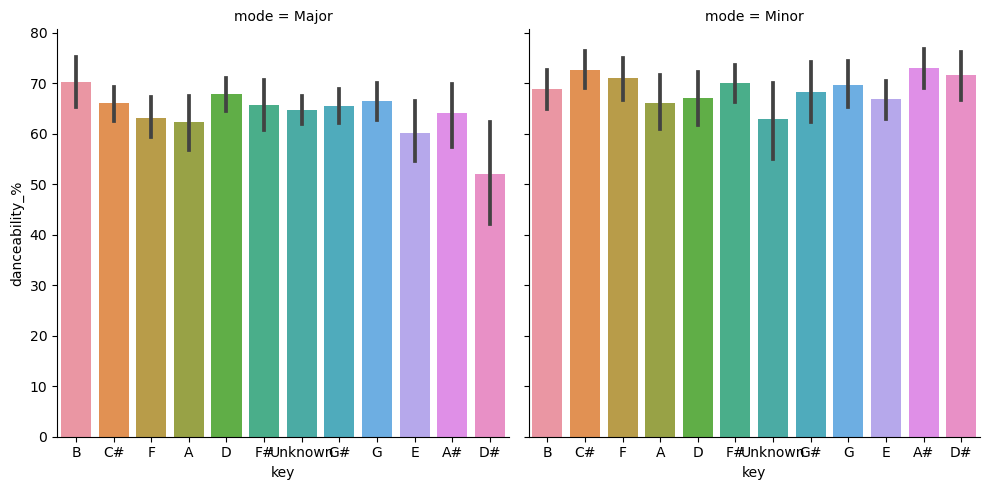

In [12]:
sns.catplot(data = streamer, x = 'key', y = 'danceability_%', col='mode', kind = 'bar')

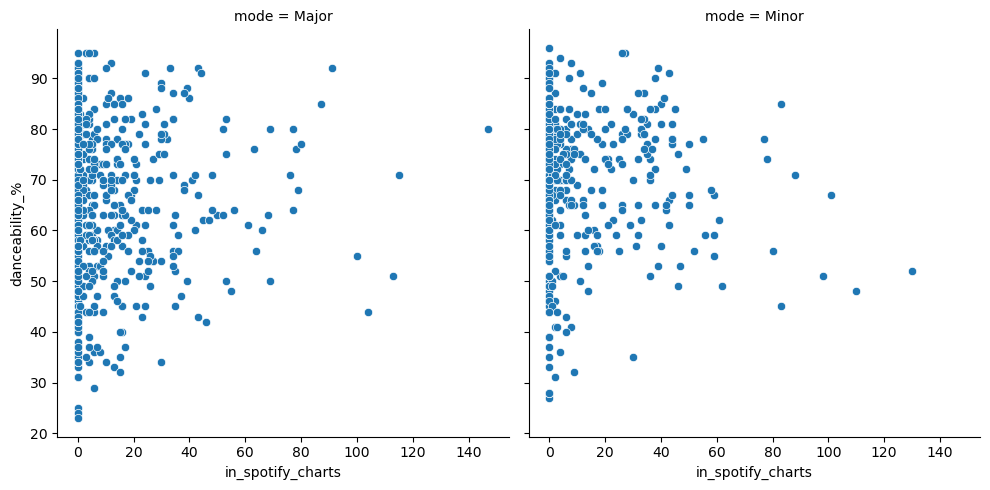

In [13]:
sns.relplot(data = streamer, x = 'in_spotify_charts', y = 'danceability_%', col='mode', kind = 'scatter')

<Axes: xlabel='in_spotify_charts', ylabel='in_deezer_charts'>

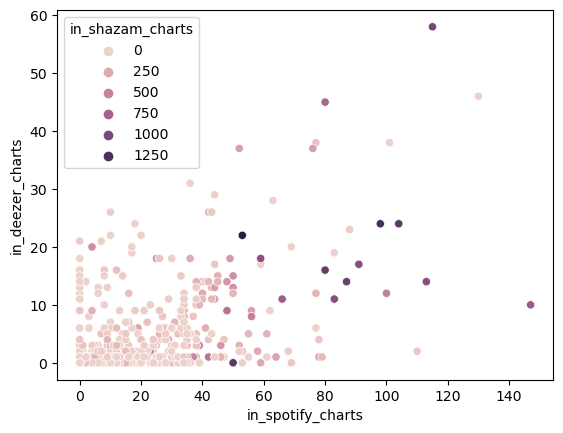

In [14]:
sns.scatterplot(x = 'in_spotify_charts', y = 'in_deezer_charts', hue = 'in_shazam_charts',  data=streamer)

c:\Users\woled\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


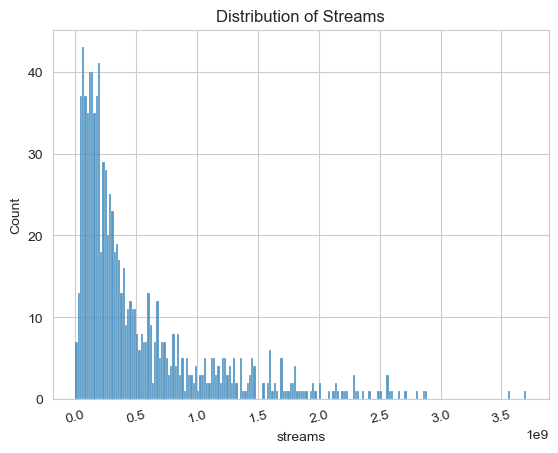

    artist_count  released_year  released_month  released_day  \
14             1           2022               3            31   
41             2           2018              10             9   

    in_spotify_playlists  in_spotify_charts       streams  in_apple_playlists  \
14                 23575                130  2.513188e+09                 403   
41                 24094                 78  2.808097e+09                 372   

    in_apple_charts  in_deezer_playlists  ...   mode  danceability_%  \
14              198                  863  ...  Minor              52   
41              117                  843  ...  Major              76   

    valence_% energy_% acousticness_%  instrumentalness_%  liveness_%  \
14         66       73             34                   0          31   
41         91       50             54                   0           7   

    speechiness_%       artist1   artist2  
14              6  Harry Styles       N/A  
41              5   Post Malone  Sw

c:\Users\woled\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


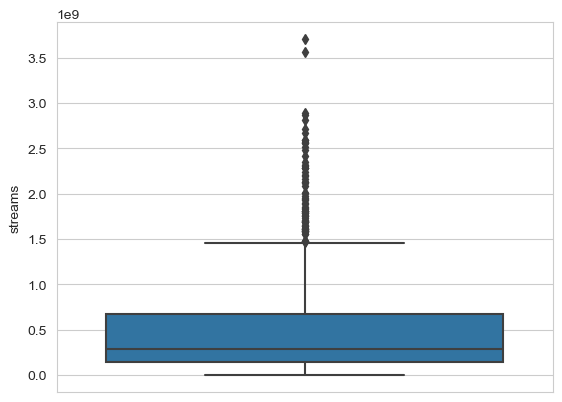

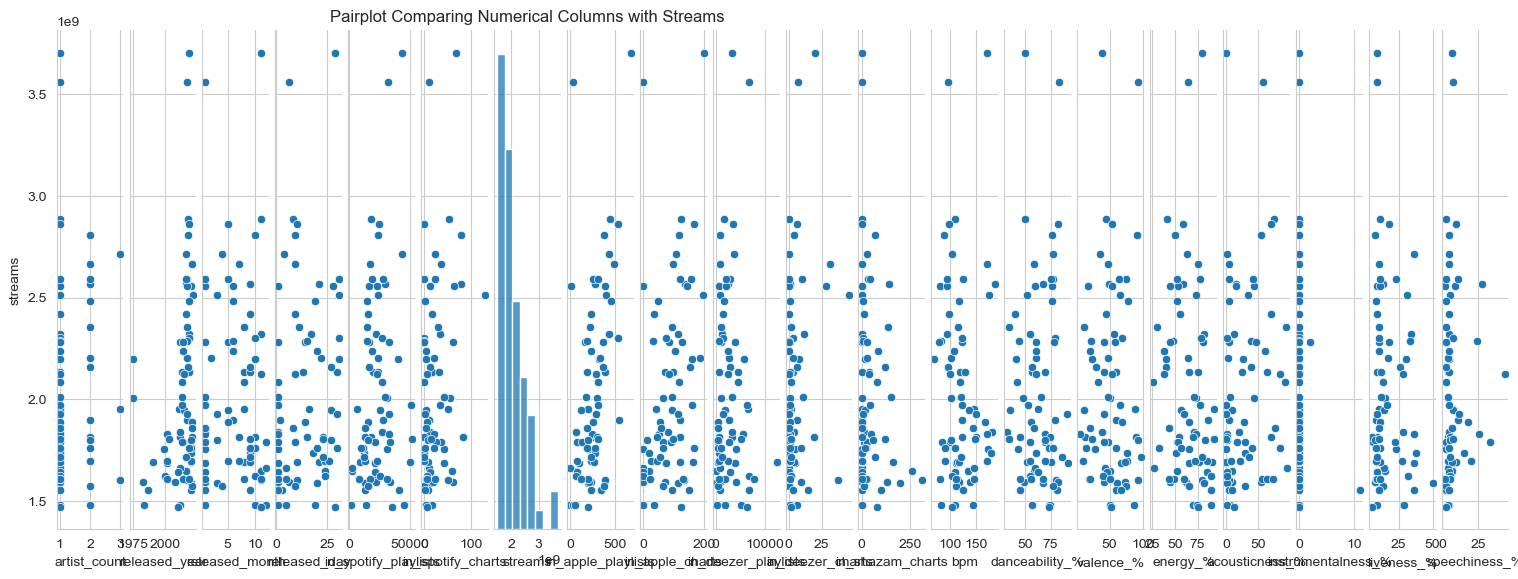

In [42]:

sns.set_style("whitegrid")

#streams analysis
streamer['streams'] = streamer['streams'].fillna(0)
(streamer['streams'].describe())

# Plot the histogram
sns.histplot(x='streams', data=streamer, bins=200)

# Set the title
plt.title('Distribution of Streams')

# Adjust the tick label format to make large numbers more readable

plt.xticks(rotation = 15)

# Show the plot
plt.show()

sns.boxplot(y = 'streams', data = streamer)


# Outlier analysis
quant75 = np.quantile(streamer['streams'], 0.75) 
quant25 = np.quantile(streamer['streams'], 0.25)
iqr = quant75 - quant25
upper_lim = quant75 + iqr * 1.5
lower_lim = quant25 - iqr * 1.5

out = streamer[(streamer['streams'] < lower_lim) | (streamer['streams'] > upper_lim)]

# Now this line will work
print(out.head(2))

# Select the numerical columns
num_columns = out.select_dtypes(include=['int64', 'float64']).columns

# Create a pairplot with the numerical columns
g = sns.pairplot(out[num_columns], y_vars='streams')
plt.title('Pairplot Comparing Numerical Columns with Streams')
g.fig.set_size_inches(15,7)
plt.title('Pairplot Comparing Numerical Columns with Streams')
plt.show()


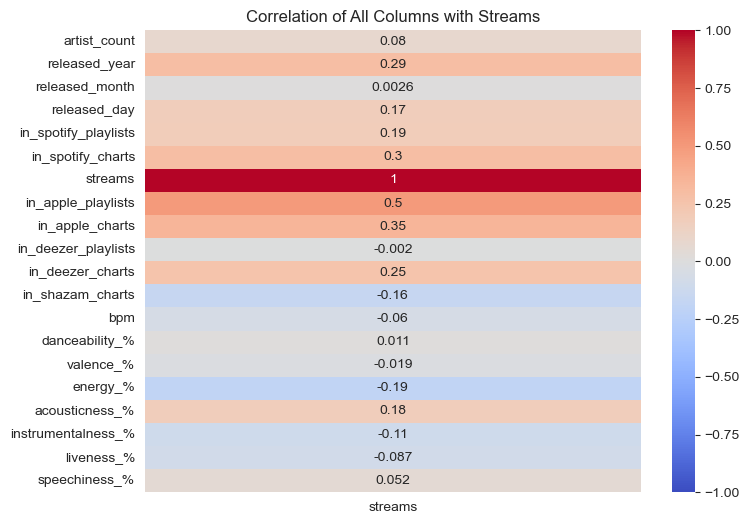

In [46]:


# Select only numerical columns (int and float types)
corr_matrix = out.select_dtypes(include=['int', 'float']).corr()

# Check if 'streams' exists in the correlation matrix
if 'streams' in corr_matrix.columns:
    # Filter the correlation of other columns with 'streams'
    corr_with_streams = corr_matrix[['streams']]

    # Plot the heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_with_streams, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Correlation of All Columns with Streams')
    plt.show()
else:
    print("Column 'streams' not found in the correlation matrix.")

